In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.express as px 

In [3]:
df = pd.read_csv('..\data\superstore.csv', encoding='latin1')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [4]:
print(df.info()) 
print(df.describe())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [5]:
print(f"Duplicates: {df.duplicated().sum()}")

Duplicates: 0


Category
Office Supplies    6026
Furniture          2121
Technology         1847
Name: count, dtype: int64


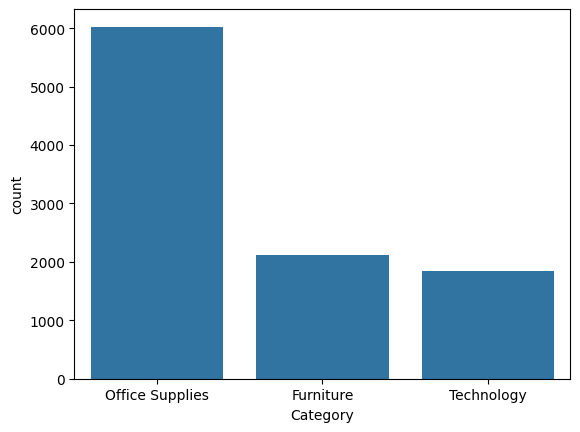

In [6]:
print(df['Category'].value_counts())
sns.countplot(data=df, x='Category', order=df['Category'].value_counts().index)
plt.show()

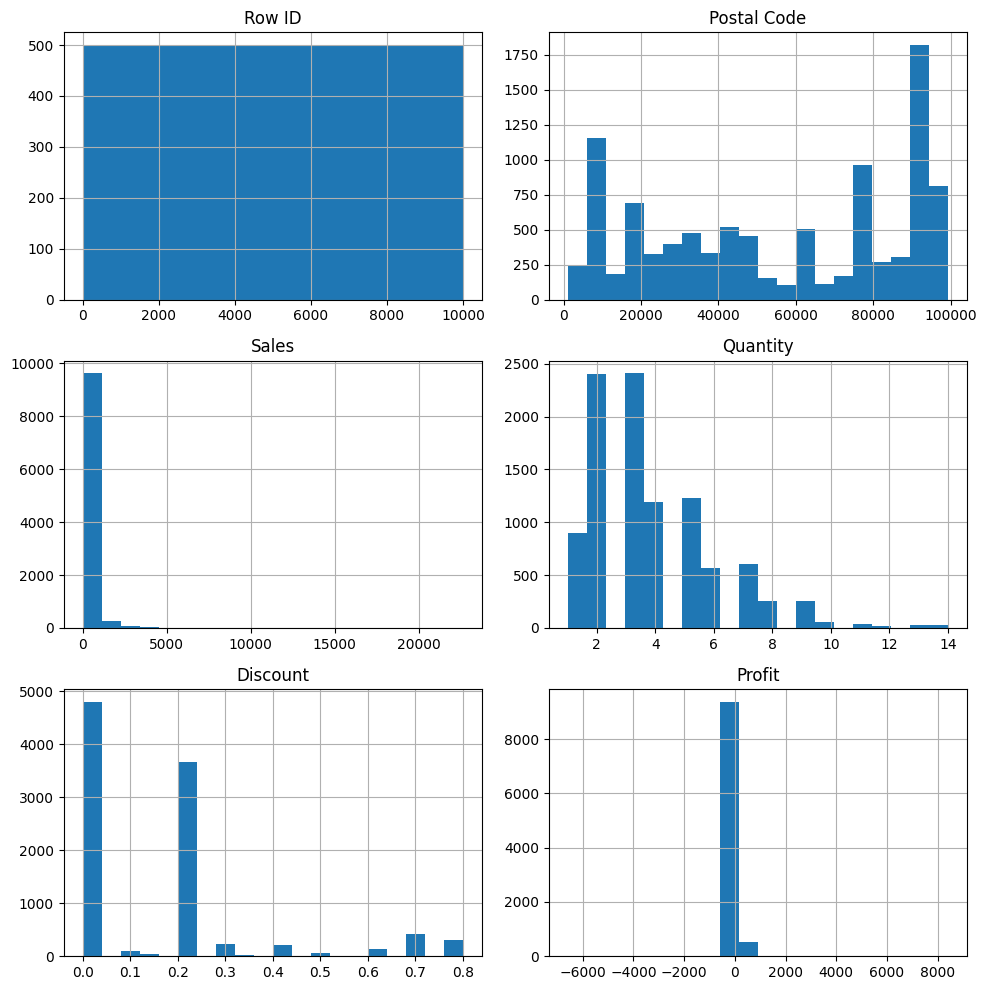

In [7]:
num_cols = df.select_dtypes(include=[np.number]).columns
df[num_cols].hist(figsize=(10, 10), bins=20)
plt.tight_layout()
plt.show()

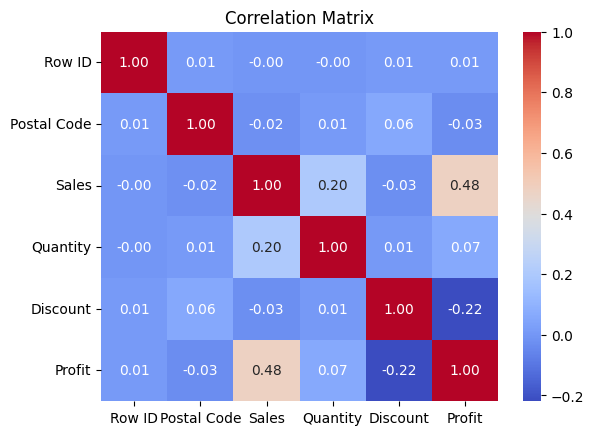

In [8]:
corr = df[num_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [14]:
product_by_category = df.groupby('Category')['Profit'].mean().sort_values(ascending=False)
product_by_category

Category
Technology         78.752002
Office Supplies    20.327050
Furniture           8.699327
Name: Profit, dtype: float64

From the dataset, we know that the category with the highest average profit is Technology. Followed by Office Supplies and Furniture as the category with the lowest average profitability.

In [15]:
flg = px.scatter(df, x='Sales', y='Profit', color='Category', title='Sales vs Profit by Category')
flg.show()

The scatter plot of Sales vs Profit by Category states that the highest profit and highest sales was achieved by the Technology category. However, at the same time the lowest profit is also from the Technology category. This means that the Technology category has the biggest gap of profit from the other categories.

In [ ]:
top_quantity = df.groupby('Product Name')['Quantity'].sum().sort_values(ascending=False).head(10)
print(top_quantity)

Product Name
Staples                                                       215
Staple envelope                                               170
Easy-staple paper                                             150
Staples in misc. colors                                        86
KI Adjustable-Height Table                                     74
Avery Non-Stick Binders                                        71
Storex Dura Pro Binders                                        71
GBC Premium Transparent Covers with Diagonal Lined Pattern     67
Situations Contoured Folding Chairs, 4/Set                     64
Staple-based wall hangings                                     62
Name: Quantity, dtype: int64


The product that sold the biggest quantity is Staples.

In [ ]:
top_profit = df.groupby('Product Name')['Profit'].sum().sort_values(ascending=False).head(10)
print(top_profit)

Product Name
Canon imageCLASS 2200 Advanced Copier                                          25199.9280
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind     7753.0390
Hewlett Packard LaserJet 3310 Copier                                            6983.8836
Canon PC1060 Personal Laser Copier                                              4570.9347
HP Designjet T520 Inkjet Large Format Printer - 24" Color                       4094.9766
Ativa V4110MDD Micro-Cut Shredder                                               3772.9461
3D Systems Cube Printer, 2nd Generation, Magenta                                3717.9714
Plantronics Savi W720 Multi-Device Wireless Headset System                      3696.2820
Ibico EPK-21 Electric Binding System                                            3345.2823
Zebra ZM400 Thermal Label Printer                                               3343.5360
Name: Profit, dtype: float64


The product that gained the biggest profit is Canon imageCLASS 2200 Advanced Copier.

In [ ]:
top_customer_sales = df.groupby('Customer Name')['Sales'].sum().sort_values(ascending=False).head(10)
print(top_customer_sales)

Customer Name
Sean Miller           25043.050
Tamara Chand          19052.218
Raymond Buch          15117.339
Tom Ashbrook          14595.620
Adrian Barton         14473.571
Ken Lonsdale          14175.229
Sanjit Chand          14142.334
Hunter Lopez          12873.298
Sanjit Engle          12209.438
Christopher Conant    12129.072
Name: Sales, dtype: float64


The Customer that has the highest sales is Sean Miller.

In [22]:
top_customer_profit = df.groupby('Customer Name')['Profit'].sum().sort_values(ascending=False).head(10)
print(top_customer_profit)

Customer Name
Tamara Chand            8981.3239
Raymond Buch            6976.0959
Sanjit Chand            5757.4119
Hunter Lopez            5622.4292
Adrian Barton           5444.8055
Tom Ashbrook            4703.7883
Christopher Martinez    3899.8904
Keith Dawkins           3038.6254
Andy Reiter             2884.6208
Daniel Raglin           2869.0760
Name: Profit, dtype: float64


However, the customer that has the biggest profitability is Tamara Chand.

In [ ]:
flg = px.scatter(df, x='Discount', y='Profit', color='Category', title='Discount vs Profit by Category')
flg.show()

From the scatter plot above, it is known that the more discount that was availbale, the less profit that was gained.

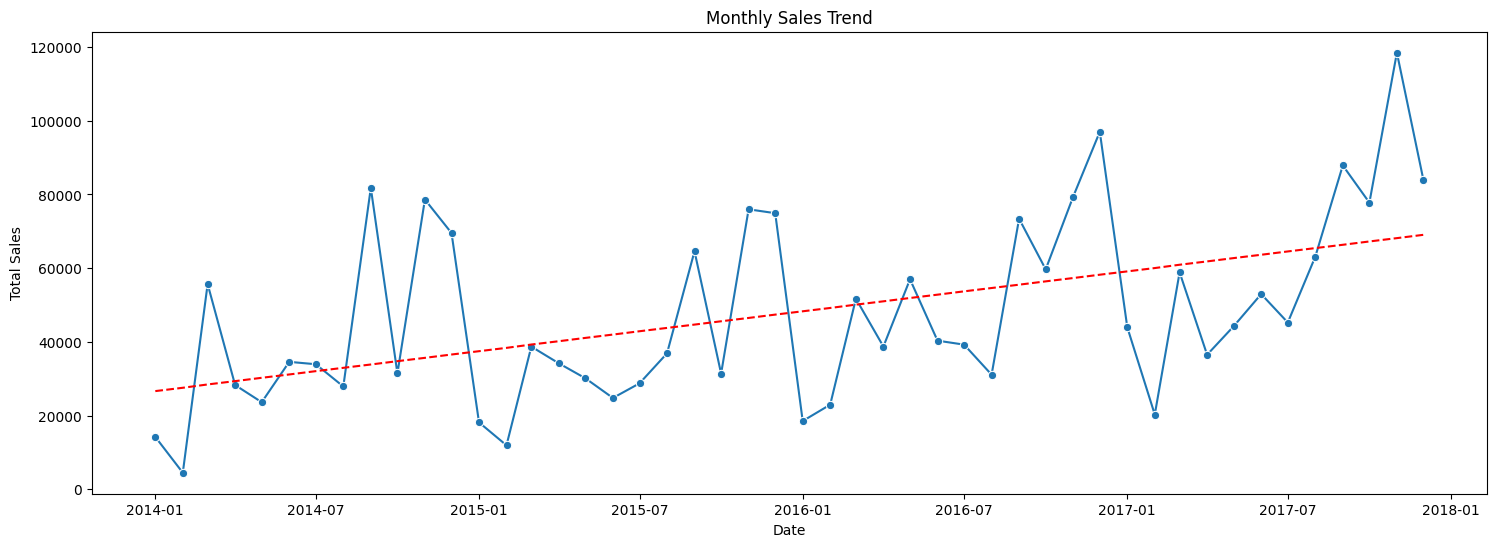

In [39]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

sales_trend = df.groupby(df['Order Date'].dt.to_period('M'))['Sales'].sum().reset_index()
sales_trend['Order Date'] = sales_trend['Order Date'].dt.to_timestamp()

x = np.arange(len(sales_trend))
y = sales_trend['Sales'].values
coef = np.polyfit(x, y, 1)        
trend = np.poly1d(coef)

plt.figure(figsize=(18,6))
sns.lineplot(data=sales_trend, x='Order Date', y='Sales', marker="o")
plt.title("Monthly Sales Trend")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.plot(sales_trend['Order Date'], trend(x), color='red', linestyle='--', label="Trend Line")
plt.show()

From the trend plot above, It is known that the total sales was always at the lowest point in the beginning of each year. Moreover, the trend itself shows that the sales was growing each year.